# Getting the optimal local Fourier approximation for MV-SDE

add description here

### Initialising libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import time

from brownian_motion import simulate_dW, simulate_dW_1d, transform_dW
from linear_true import SDE_Linear_MV
from linear_appr import SDE_Linear_MV_appr
from algorithm import SGD_MV

## McKean-Vlasov SDE of Kuramoto's type.

### We initialise the main class and test it.

We initialise the class of MV-SDE that admits the following dynamics:

$$
\text{d}X_t = (\alpha X_t + \beta~\mathbb{E}[X_t])\text{d}t + \sigma ~\text{d}W_t, \quad X_0 = x_0 \in \mathbb{R}.
$$

We know that $$\mathbb{E}[X_t] = x_0\exp((\alpha+\beta)t).$$

We approximate using the standard SDE

$$
\text{d}X^N_t = \big(\alpha X_t + \beta\sum_{i=1}^N\gamma_i \mathbb{1}_{[t_{i-1},t_i)}(t)\big)\text{d}t + \sigma ~\text{d}W_t, \quad X_0 = x_0 \in \mathbb{R}.
$$

The gradient path $\xi^i :=\partial_{\gamma_i}X$ then

$$
\text{d}\xi^i_t = \big(\alpha \xi_t + \beta\mathbb{1}_{[t_{i-1},t_i)}(t)\big)\text{d}t, \quad \xi_0 = 0 \in \mathbb{R}.
$$

Set partition $\pi$ of $[0,T]$ as $\pi = [t_0,t_1,t_2,\dots]$.

Set $i = 1$, now we write $\xi^1$ and $t \in [0,T]$, 
$$
\text{d}\xi^1_t 
 = \big(\alpha \xi^1_t + \beta\mathbb{1}_{[t_{i-1},t_i)}(t)\big)\text{d}t
\Rightarrow \xi^1_t= 0 + \int_0^t (\cdots) dt =  
$$

Jacobian is $J = (b_{i,i^\prime})_{i = 1, i^\prime = 1}^{n,n}$, where $b_{i,i^\prime} = \frac\partial{\partial_{\gamma^{i^\prime}}} X_{t_i} - \delta_{i,i^\prime} = \xi^{i^\prime}_{t_i} - \delta$

## ***write on approximation***

## Testing the variance $\gamma$ obtained from the algorithm.

In [3]:
n_discr_test = 100
N_iter = 100000

x_0 = 1
sigma = 1
alpha = - 0.5
beta = 0.3
T = 0.2

f = open(f"output/gamma_n_discr_{n_discr_test}_N_iter_{N_iter}_T_{T}_{time.time()}.txt", "w+")

gamma_starting = np.zeros(n_discr_test)
gamma_starting[0] = x_0
gamma_starting[1:] = np.random.uniform(low = - 0.3, high = 0.3, size = n_discr_test - 1)

gammas_eta = []

gammas_cyclical = []
#eta = 0.05

SGD_linear = SGD_MV(x_0 = x_0, sigma = sigma, alpha = alpha, beta = beta, T = T)

etas_test = np.linspace(0.001,0.1,20)

# for eta in etas_test:
#     gamma, errors = SGD_linear.linear_get_gamma(n_discr = n_discr_test, eta = eta, gamma = gamma_starting, eps = 1e-10, N_iter = 100000, cyclic_lr = False)
#     print(gamma)
#     f.write(f'\tGamma for n_discr = {n_discr_test}, eta = {eta}, eps = {1e-10}, N_iter = {N_iter}, cyclic_lr = {False} is \n\n {gamma}\n\n')
#     f.write('=========================================================================================================\n')
#     gammas.append(gamma)

for i in range(5):
    gamma, errors = SGD_linear.linear_get_gamma(n_discr = n_discr_test, eta = 0.05, gamma = gamma_starting, eps = 1e-5, N_iter = N_iter, cyclic_lr = True)
    print(gamma)
    f.write(f'\tGamma for n_discr = {n_discr_test}, eta = {0.05}, eps = {1e-10}, N_iter = {N_iter}, cyclic_lr = {True}, is \n\n \t\t{gamma}\n\n')
    f.write('=========================================================================================================\n')
    gammas_cyclical.append(gamma)
    
f.close()

|20% of the iterations completed.|
|30% of the iterations completed.|
|40% of the iterations completed.|
|50% of the iterations completed.|
|60% of the iterations completed.|
|70% of the iterations completed.|
|80% of the iterations completed.|
|90% of the iterations completed.|
|100% of the iterations completed.|
Solved for 507.8 seconds.
[0.99999    0.99938942 0.99905868 0.99888276 0.99880311 0.99830373
 0.99768385 0.99748634 0.99660149 0.99619322 0.99594572 0.99563746
 0.99534754 0.99494203 0.99479    0.99443589 0.99376893 0.99325427
 0.99309288 0.99269447 0.99227507 0.99210966 0.99195057 0.99158058
 0.9911566  0.99086133 0.99029284 0.98979718 0.98953755 0.98940226
 0.98903143 0.98892215 0.98867789 0.98809662 0.98760147 0.9868931
 0.98657802 0.98605943 0.98542056 0.98528786 0.98493147 0.98443759
 0.98398796 0.98362573 0.98315213 0.98278545 0.98246488 0.98199727
 0.98146279 0.98108745 0.98061808 0.98031268 0.98032214 0.980142
 0.97979342 0.9793592  0.97916104 0.97893296 0.97847373 0.

KeyboardInterrupt: 

### We save the average of the SGD gammas to use further in the benchmark.

In [4]:
gamma_average_sgd = np.mean(gammas_cyclical, axis = 0)
print(f'Average gamma is {gamma_average_sgd}')

Average gamma is [0.99999    0.99938942 0.99905868 0.99888276 0.99880311 0.99830373
 0.99768385 0.99748634 0.99660149 0.99619322 0.99594572 0.99563746
 0.99534754 0.99494203 0.99479    0.99443589 0.99376893 0.99325427
 0.99309288 0.99269447 0.99227507 0.99210966 0.99195057 0.99158058
 0.9911566  0.99086133 0.99029284 0.98979718 0.98953755 0.98940226
 0.98903143 0.98892215 0.98867789 0.98809662 0.98760147 0.9868931
 0.98657802 0.98605943 0.98542056 0.98528786 0.98493147 0.98443759
 0.98398796 0.98362573 0.98315213 0.98278545 0.98246488 0.98199727
 0.98146279 0.98108745 0.98061808 0.98031268 0.98032214 0.980142
 0.97979342 0.9793592  0.97916104 0.97893296 0.97847373 0.97799509
 0.97763132 0.97717764 0.97684755 0.97656906 0.97623147 0.9756928
 0.97518005 0.974804   0.9743427  0.97371931 0.97342791 0.97299496
 0.97209435 0.97121268 0.97086847 0.9703217  0.96986851 0.9694536
 0.96880689 0.96877546 0.96810785 0.96754568 0.96722329 0.96672773
 0.9656988  0.96536232 0.96503541 0.96484549 0.964

## Gamma benchmark: comparison of the average of the gammas obtained through SGD and gamma of the MC estimate of the particles system.

Gamma with algorithm is 
[0.99999    0.99938942 0.99905868 0.99888276 0.99880311 0.99830373
 0.99768385 0.99748634 0.99660149 0.99619322 0.99594572 0.99563746
 0.99534754 0.99494203 0.99479    0.99443589 0.99376893 0.99325427
 0.99309288 0.99269447 0.99227507 0.99210966 0.99195057 0.99158058
 0.9911566  0.99086133 0.99029284 0.98979718 0.98953755 0.98940226
 0.98903143 0.98892215 0.98867789 0.98809662 0.98760147 0.9868931
 0.98657802 0.98605943 0.98542056 0.98528786 0.98493147 0.98443759
 0.98398796 0.98362573 0.98315213 0.98278545 0.98246488 0.98199727
 0.98146279 0.98108745 0.98061808 0.98031268 0.98032214 0.980142
 0.97979342 0.9793592  0.97916104 0.97893296 0.97847373 0.97799509
 0.97763132 0.97717764 0.97684755 0.97656906 0.97623147 0.9756928
 0.97518005 0.974804   0.9743427  0.97371931 0.97342791 0.97299496
 0.97209435 0.97121268 0.97086847 0.9703217  0.96986851 0.9694536
 0.96880689 0.96877546 0.96810785 0.96754568 0.96722329 0.96672773
 0.9656988  0.96536232 0.96503541 0.964845

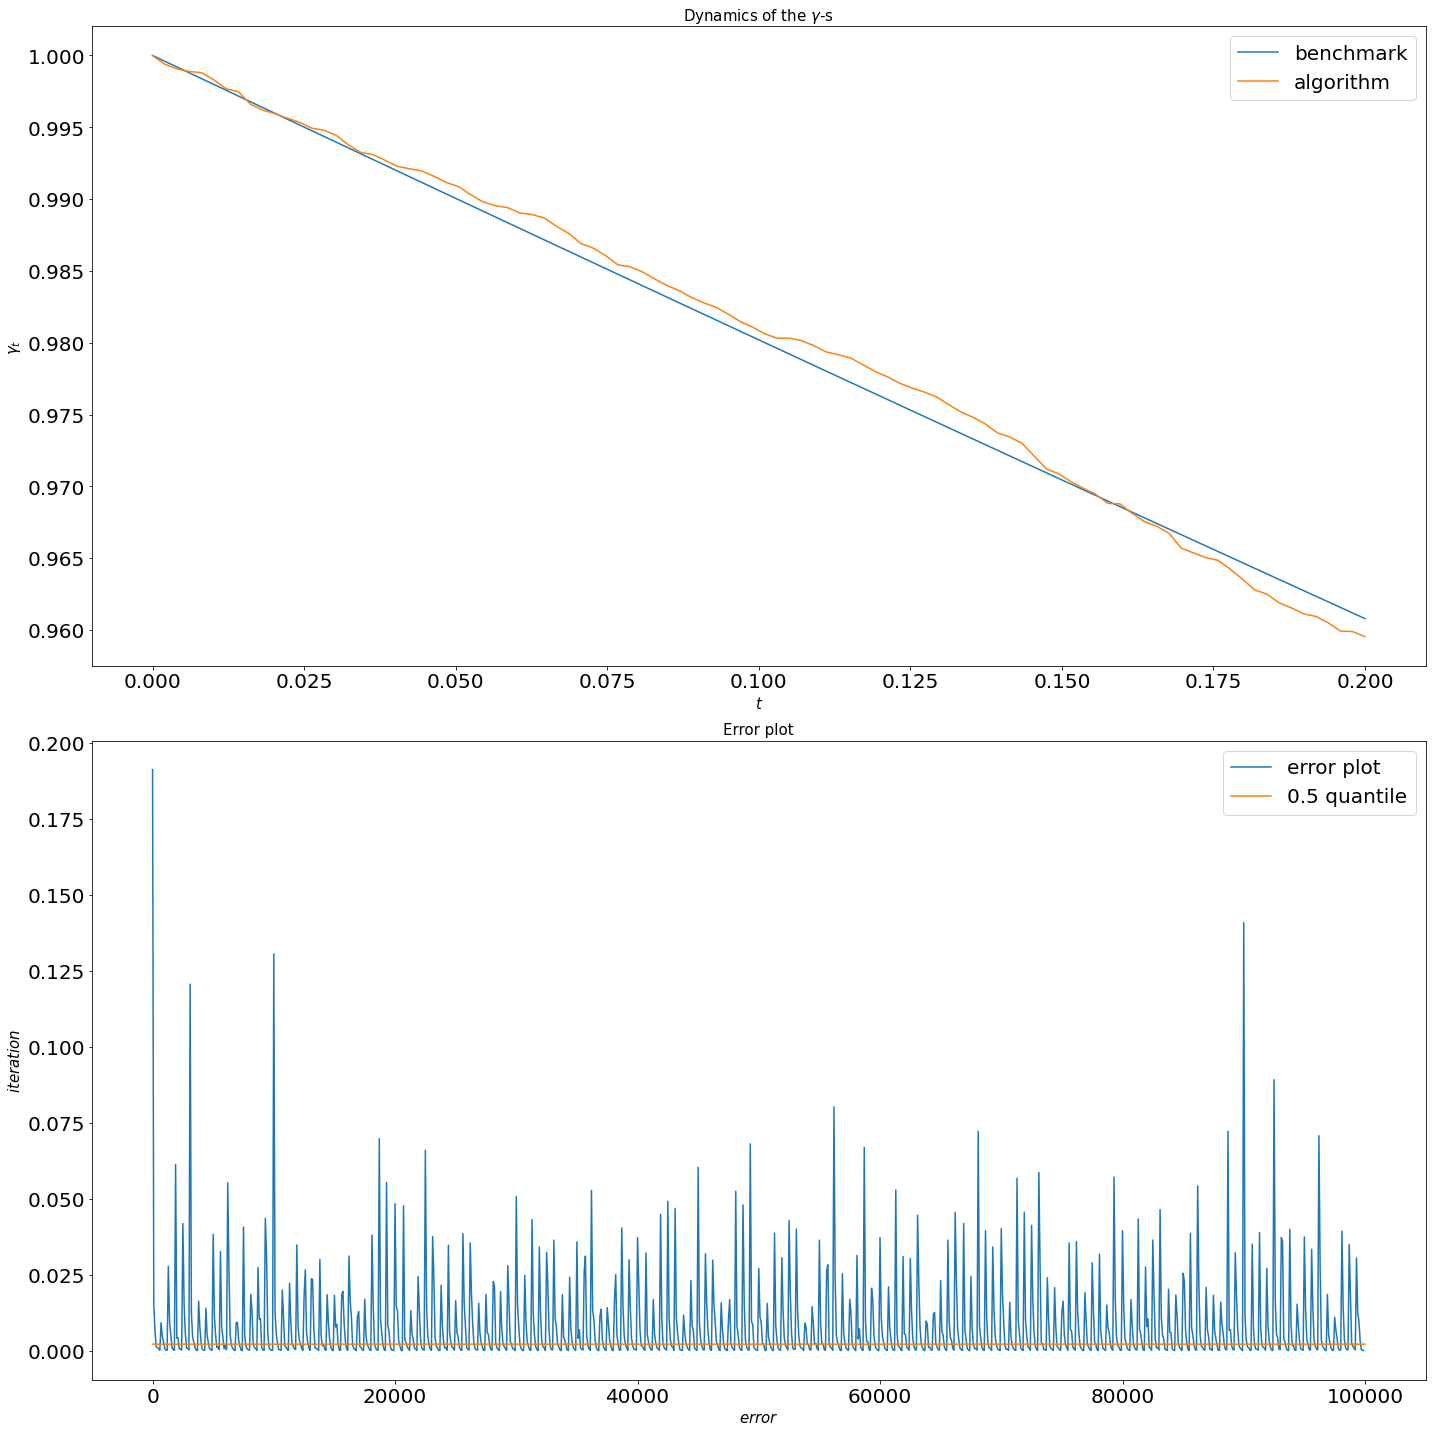

In [7]:
#print(f'Average gamma from the algorithm is \n{gamma_average_sgd}.\n')

n_discr_high = 100
n_part = 10000
x_0 = 1
T = 0.2
alpha = -0.5
beta = 0.3

# dW_t = simulate_dW(n_part, T = T)
# X_true = SDE_Kuramoto_MV(x_0 = x_0, alpha = -0.5, beta = 0.3 sigma = 1, dW_t = dW_t, T = T, n_discr = n_discr_high, n_part = n_part)

t_benchmark = np.linspace(0,T,n_discr_high)

t_sgd = np.linspace(0,T,n_discr_test)

gamma_benchmark = np.exp((alpha + beta) * t_benchmark)

print(f'Gamma with algorithm is \n{gamma_average_sgd}.\n')

print(f'Gamma benchmark is \n{gamma_benchmark}.\n')

fig, ax = plt.subplots(2,1, figsize = (20, 20), tight_layout=True)

ax[0].set_title(r"Dynamics of the $\gamma$-s", fontsize = 15)
ax[0].set_xlabel(r'$t$',fontsize = 15)
ax[0].set_ylabel(r'$\gamma_t$',fontsize = 15)
ax[0].tick_params(axis='both', which='major', labelsize = 20)
ax[0].tick_params(axis='both', which='minor', labelsize = 20)

ax[0].plot(t_benchmark, gamma_benchmark, label = 'benchmark')
ax[0].plot(t_sgd, gamma_average_sgd, label = 'algorithm')

ax[0].legend(loc = 'best', fontsize = 20)

ax[1].set_title(r"Error plot", fontsize = 15)
ax[1].set_xlabel(r'$error$',fontsize = 15)
ax[1].set_ylabel(r'$iteration$',fontsize = 15)
ax[1].tick_params(axis='both', which='major', labelsize = 20)
ax[1].tick_params(axis='both', which='minor', labelsize = 20)

ax[1].plot(np.arange(N_iter)[::100], (errors[::100]), label = 'error plot')
#ax[1].plot(t_sgd, gamma_average_sgd, label = 'algorithm')
ax[1].plot(np.arange(N_iter),[np.quantile((errors),0.5)] * N_iter, label = '0.5 quantile')

ax[1].legend(loc = 'best', fontsize = 20)

plt.show()

# print(f'The error is {gamma_average_sgd - gamma_benchmark}.\n')
# print(f'The maximum norm is {abs(gamma_average_sgd - gamma_benchmark).max()}\n')

In [ ]:

# # dW_t_truncated = dW_t[0]

# t = np.linspace(0, T, n_discr)
        
# fig, ax = plt.subplots(1,1,figsize=(15, 10), tight_layout=True)

# ax.set_title(r"Dynamics of the SDE", fontsize = 15)
# ax.set_xlabel(r'$t$',fontsize = 15)
# ax.set_ylabel(r'$X_t$',fontsize = 15)
# ax.tick_params(axis='both', which='major', labelsize = 20)
# ax.tick_params(axis='both', which='minor', labelsize = 20)

# # for n in range(length(n_frequency_range)):
# #     dW_t_local = transform_dW(dW_t,n_discr,n_frequency_range[n])
# #     X_test = SDE_Kuramoto_MV_appr(X_true.x_0[0], sigma, gammas_freq[n], dW_t_local, T, n_discr_high // n_frequency_range[n])
# #     ax.plot(t, X_test.x, label = 'our approximation')
    
# ax.plot(t, X_true.x[0],c = 'r', label = 'particle approxmiation')
# plt.legend(loc = 'best', fontsize = 20)
# plt.show()

In [ ]:
# n_discr_high = 20

# gamma_starting = np.random.uniform(low = - 0.3, high = 0.3, size = (2,n_discr_high))
# gamma_reference = SGD_MV(n_discr = n_discr_high, eta = 0.01, gamma = gamma_starting, T = 1, eps = 0.005, N_iter = 5000)

In [ ]:
# n_discr = n_discr_high

# gamma_ref = gamma_reference

# n_mc = 10000
# t = np.linspace(0,1,n_discr)

# fig, ax = plt.subplots(1,2,figsize=(18, 10), tight_layout=True)

# ax[0].set_title(r"Dynamics of the $\gamma$ of $\sin$", fontsize = 15)
# ax[0].set_xlabel(r'$t$',fontsize = 15)
# ax[0].set_ylabel(r'$\gamma_t$',fontsize = 15)
# ax[0].tick_params(axis='both', which='major', labelsize = 20)
# ax[0].tick_params(axis='both', which='minor', labelsize = 20)

# ax[1].set_title(r"Dynamics of the $\gamma$ of $\cos$", fontsize = 15)
# ax[1].set_xlabel(r'$t$',fontsize = 15)
# ax[1].set_ylabel(r'$\gamma_t$',fontsize = 15)
# ax[1].tick_params(axis='both', which='major', labelsize = 20)
# ax[1].tick_params(axis='both', which='minor', labelsize = 20)

# T = 1

# gamma_aver_mc = np.zeros((2,n_discr))
# for j in range(20):
#     for i in range(n_mc):
#         dW_t = simulate_dW_1d(n_discr, T)
#         X = SDE_Kuramoto_MV_appr(x_0, sigma, gamma_ref, dW_t, T, n_discr)
#         gamma_aver_mc[0] = gamma_aver_mc[0] * i / (i + 1) + np.sin(X.x) * 1 / (i + 1)
#         gamma_aver_mc[1] = gamma_aver_mc[1] * i / (i + 1) + (-np.cos(X.x)) * 1 / (i + 1)
#     print(f'Gamma benchmark is: \n{gamma_aver_mc}\n\n')
#     print(f'The difference between MC gamma_aver and gamma_aver from the algorithm for {n_discr} is: \n\n{gamma_aver_mc - gamma_ref}')

#     print(f'\nThe maximum norm for {n_discr}: {abs(gamma_aver_mc - gamma_ref).max()}.')
#     print('\n_____________________________________________a______________________________________________')
#     print('___________________________________________________________________________________________\n')
    
#     # for n in range(length(n_frequency_range)):
#     #     dW_t_local = transform_dW(dW_t,n_discr,n_frequency_range[n])
#     #     X_test = SDE_Kuramoto_MV_appr(X_true.x_0[0], sigma, gammas_freq[n], dW_t_local, T, n_discr_high // n_frequency_range[n])
#     #     ax.plot(t, X_test.x, label = 'our approximation')

#     ax[0].plot(t, gamma_aver_mc[0], label = j)
#     ax[1].plot(t, gamma_aver_mc[1], label = j)
    
# ax[0].plot(t,gamma_ref[0], label = 'gamma_ref')
# ax[1].plot(t,gamma_ref[1], label = 'gamma_ref')
# plt.legend(loc = 'best', fontsize = 20)
# plt.show()

In [ ]:
n_discr_test = [2,5,10]
etas_test = [0.1,0.05,0.01,0.005,0.001]
N_iter_test = [100,200,500,1000,5000,10000]
tol_test = [0.1,0.05,0.01,0.005,0.001]

x_0 = 1

gamma_starting = np.zeros(100)
gamma_starting[1:] = np.random.uniform(low = - 0.3, high = 0.3, size = 100 - 1)



for n_discr_i in range(len(n_discr_test)):
    for eta_i in range(len(etas_test)):
        
        fig, ax = plt.subplots(len(N_iter_test),len(tol_test),figsize=(40, 30), tight_layout=True)
        t_high = np.linspace(0,T,n_discr_high)
        for N_iter_i in range(len(N_iter_test)):
            for tol_i in range(len(tol_test)):
                gamma_starting_local = np.zeros(n_discr_test[n_discr_i])
                #print(n_discr_test[n_discr_i])
                gamma_starting_local = gamma_starting[::100 // n_discr_test[n_discr_i]]

                gamma_sol = SGD_MV(n_discr = n_discr_test[n_discr_i], eta = etas_test[eta_i], gamma = gamma_starting_local, T = 0.2, eps = tol_test[tol_i], N_iter = N_iter_test[N_iter_i], key = 'linear')

                print(f'For n_discr = {n_discr_test[n_discr_i]}, eta = {etas_test[eta_i]}, N_iter = {N_iter_test[N_iter_i]}, tol_i = {tol_test[tol_i]} the gamma is \n {gamma_sol}. \n\n')
                
                ax[N_iter_i][tol_i].set_title(f"{N_iter_test[N_iter_i]} iterations, {tol_test[tol_i]} tolerance", fontsize = 15)
                ax[N_iter_i][tol_i].set_xlabel(r'$t$',fontsize = 15)
                ax[N_iter_i][tol_i].set_ylabel(r'$\gamma_t$',fontsize = 15)
                ax[N_iter_i][tol_i].tick_params(axis='both', which='major', labelsize = 20)
                ax[N_iter_i][tol_i].tick_params(axis='both', which='minor', labelsize = 20)
                
                t = np.linspace(0,T,n_discr_test[n_discr_i])
                ax[N_iter_i][tol_i].plot(t, gamma_sol[0], c = 'r', label = 'our approximation for gamma[0]')
                ax[N_iter_i][tol_i].plot(t, gamma_sol[1], c = 'b', label = 'our approximation for gamma[1]')
                
                
                ax[N_iter_i][tol_i].plot(t_high, gamma_benchmark[0], 'r--', label = 'benchmark for gamma[0]')
                ax[N_iter_i][tol_i].plot(t_high, gamma_benchmark[1], 'b--', label = 'benchmark for gamma[1]')
        plt.show()

In [ ]:
n_discr_test = [20]
etas_test = [0.1,0.05,0.01,0.005,0.001]
N_iter_test = [100,200,500,1000,5000,10000]
tol_test = [0.1,0.05,0.01,0.005,0.001]

x_0 = 1

gamma_starting = np.zeros((2,100))
gamma_starting[0][0] = np.sin(x_0)
gamma_starting[1][0] = - np.cos(x_0)
gamma_starting[:,1:] = np.random.uniform(low = - 0.3, high = 0.3, size = (2,100 - 1))



for n_discr_i in range(len(n_discr_test)):
    for eta_i in range(len(etas_test)):
        
        fig, ax = plt.subplots(len(N_iter_test),len(tol_test),figsize=(40, 30), tight_layout=True)
        t_high = np.linspace(0,T,n_discr_high)
        for N_iter_i in range(len(N_iter_test)):
            for tol_i in range(len(tol_test)):
                gamma_starting_local = np.zeros((2,n_discr_test[n_discr_i]))
                #print(n_discr_test[n_discr_i])
                gamma_starting_local[0] = gamma_starting[0][::100 // n_discr_test[n_discr_i]]
                gamma_starting_local[1] = gamma_starting[1][::100 // n_discr_test[n_discr_i]]

                gamma_sol = SGD_MV(n_discr = n_discr_test[n_discr_i], eta = etas_test[eta_i], gamma = gamma_starting_local, T = 0.2, eps = tol_test[tol_i], N_iter = N_iter_test[N_iter_i], key = 'linear')

                print(f'For n_discr = {n_discr_test[n_discr_i]}, eta = {etas_test[eta_i]}, N_iter = {N_iter_test[N_iter_i]}, tol_i = {tol_test[tol_i]} the gamma is \n {gamma_sol}. \n\n')
                
                ax[N_iter_i][tol_i].set_title(f"{N_iter_test[N_iter_i]} iterations, {tol_test[tol_i]} tolerance", fontsize = 15)
                ax[N_iter_i][tol_i].set_xlabel(r'$t$',fontsize = 15)
                ax[N_iter_i][tol_i].set_ylabel(r'$\gamma_t$',fontsize = 15)
                ax[N_iter_i][tol_i].tick_params(axis='both', which='major', labelsize = 20)
                ax[N_iter_i][tol_i].tick_params(axis='both', which='minor', labelsize = 20)
                
                t = np.linspace(0,T,n_discr_test[n_discr_i])
                ax[N_iter_i][tol_i].plot(t, gamma_sol[0], c = 'r', label = 'our approximation for gamma[0]')
                ax[N_iter_i][tol_i].plot(t, gamma_sol[1], c = 'b', label = 'our approximation for gamma[1]')
                
                
                ax[N_iter_i][tol_i].plot(t_high, gamma_benchmark[0], 'r--', label = 'benchmark for gamma[0]')
                ax[N_iter_i][tol_i].plot(t_high, gamma_benchmark[1], 'b--', label = 'benchmark for gamma[1]')
        plt.show()